In [54]:
!git clone https://github.com/MikolajMezyk/projektML.git
%cd projektML

Cloning into 'projektML'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 29 (delta 11), reused 15 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 810.10 KiB | 7.71 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/projektML/projektML/projektML/projektML


In [71]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt



pd.set_option("display.max_columns", None)


### Rozznanie

In [56]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.shape


(7043, 21)

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Balans klas

In [61]:
fig = px.pie(
    df,
    names="Churn",
    title="Udział klientów churn vs non-churn"
)
fig.show()


### Korealacja danych

In [72]:
da = df.copy()

da = da.drop(columns=["customerID"])

numeric_cols = ["TotalCharges",  "MonthlyCharges", "tenure"]

for col in numeric_cols:
    da[col] = pd.to_numeric(da[col], errors="coerce")  # nieprawidłowe wartości -> NaN

print("Ilość Nan:")
print( da[numeric_cols].isna().sum())

for col in numeric_cols:
    da[col] = da[col].fillna(da[col].median())

replace_map = {
    "No internet service": "No",
    "No phone service": "No"
}

for col in [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"
]:
    da[col] = da[col].replace(replace_map)

for col in [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "Partner", "PhoneService", "Dependents",
    "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines", "PaperlessBilling"
]:
    da[col] = da[col].map({"Yes": 1, "No": 0})

da["Churn"] = da["Churn"].map({"Yes": 1, "No": 0})


Ilość Nan:
TotalCharges      11
MonthlyCharges     0
tenure             0
dtype: int64


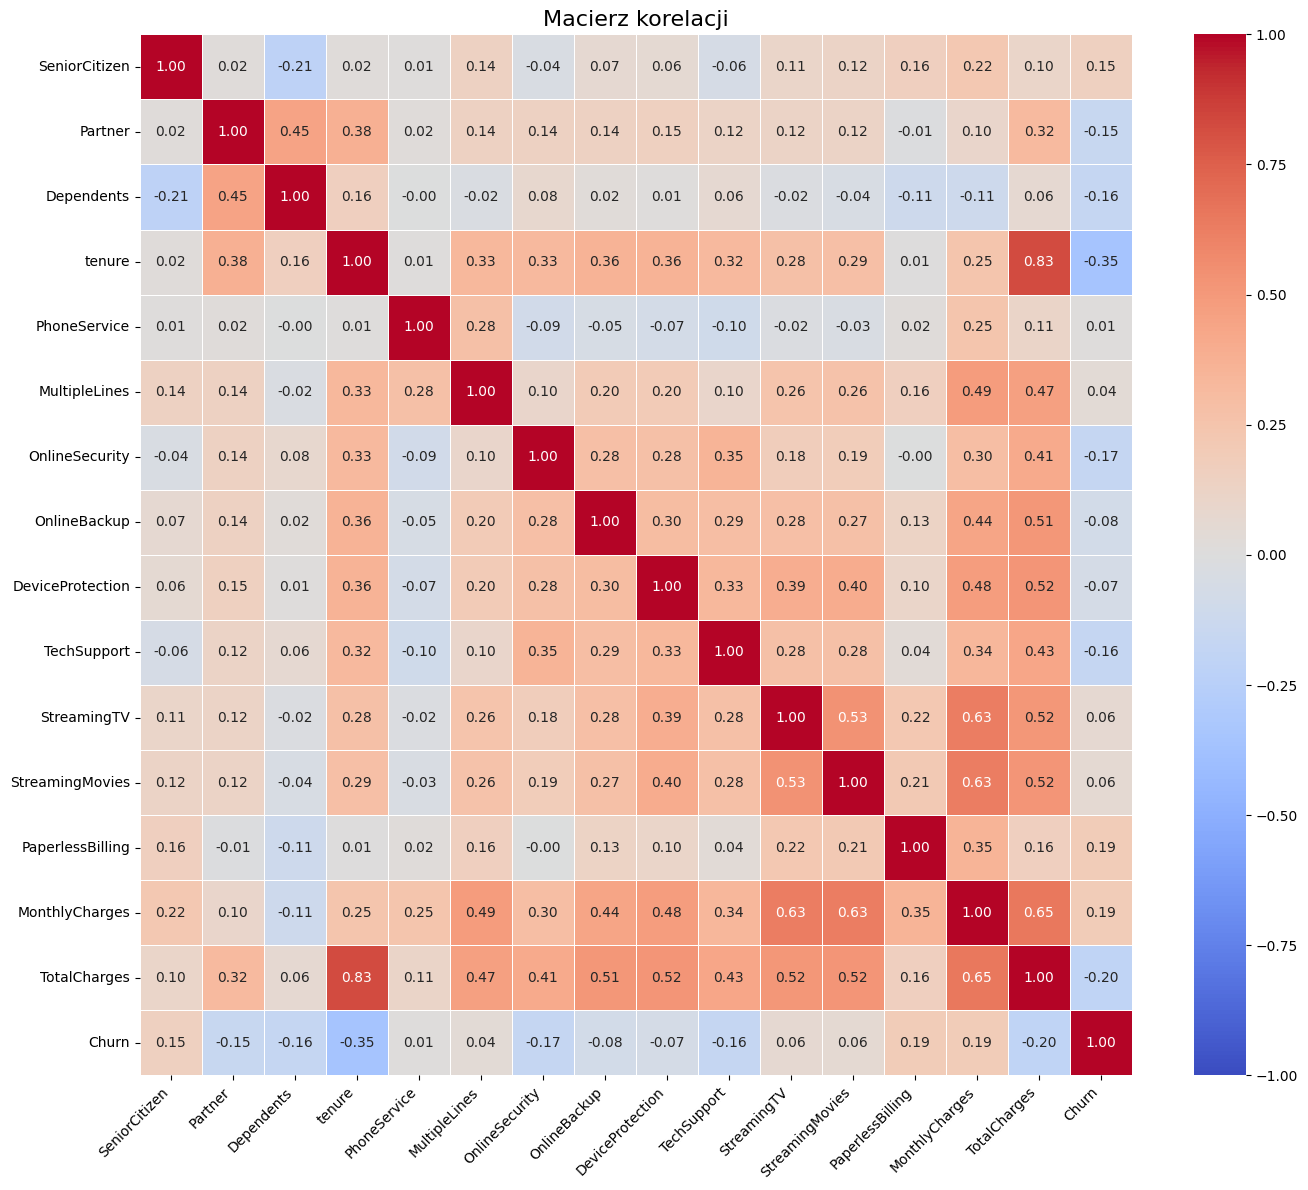

In [79]:
corr = da.corr(numeric_only=True)

plt.figure(figsize=(14, 12))

sns.heatmap(
    corr,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)

plt.title("Macierz korelacji", fontsize=16)

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()



Najsilniejsza zależność z Churnem występuje z **tenure** (korelacja ≈ -0,35)  
-> im dłużej klient jest z firmą tym mniejsze ppb churnu  

Churn na też umierkowaną korelację z:
- SeniorCitizen (+0,15)
- Partner (-0,15)
- Dependents (-0,16)
- OnlineSecurity (-0,17)
- TechSupport (-0,16)
- TotalCharges (-0,20) - "dużo zapłacił klient łącznie" = długo jest z firmą
- MonthlyCharges (+0,19) - wyższe połaty -> wyższe ppb churnu
- PaperlessBilling (+0,19)

_  
Dodawkowo większość z nich jest umiarkowanie skorelowana z **tenure**
- SeniorCitizen (+0,02)
- Partner (+0,38)
- Dependents (+0,16)
- OnlineSecurity (+0,33)
- TechSupport (+0,32)
- TotalCharges (+0,83)
- MonthlyCharges (+0,25)
- PaperlessBilling (+0,01)  

-> klienci długo letni częściej posiadają usługi dodatkowe, generują łącznie wyższe przychody, rzadziej odchodzą

_  
Dodatkowo   
tenure <-> TotalCharges = 0,83  
TotalCharges <-> MonthlyCharges = 0,65

_  
Oraz MonthlyCharges jak i TotalCharges są mocno skorelowane z usługami

_  
Partner <-> Dependents = 0,45
- Partner <-> **tenure** = 0,38
- Dependents <-> **tenure** = 0,16

### Tenure vs Churn

In [62]:
fig = px.histogram(
    df,
    x="tenure",
    color="Churn",
    nbins=40,
    barmode="overlay",
    title="Rozkład tenure z podziałem na Churn"
)
fig.show()


In [75]:
fig = px.box(
    df,
    x="Churn",
    y="tenure",
    title="Tenure vs Churn",
    color="Churn",
)
fig.show()


### Reszta ciekawych cech vs Churn

In [64]:
fig = px.histogram(
    df,
    x="MonthlyCharges",
    color="Churn",
    nbins=40,
    barmode="overlay",
    title="Rozkład Monthly Charges a Churn"
)
fig.show()


In [65]:
fig = px.histogram(
    df,
    x="Contract",
    color="Churn",
    barmode="group",
    title="Typ kontraktu a Churn"
)
fig.show()


In [66]:
fig = px.histogram(
    df,
    x="PaymentMethod",
    color="Churn",
    barmode="group",
    title="Metoda płatności a Churn"
)
fig.update_layout(xaxis_tickangle=30)
fig.show()


In [67]:
fig = px.histogram(
    df,
    x="InternetService",
    color="Churn",
    barmode="group",
    title="Typ internetu a Churn"
)
fig.show()


In [68]:
df["tenure_bucket"] = pd.cut(
    df["tenure"],
    bins=[0, 3, 6, 12, 24, 100],
    labels=["0-3", "4-6", "7-12", "13-24", "25+"],
    right=True
)


In [69]:
fig = px.histogram(
    df,
    x="tenure_bucket",
    color="Churn",
    barmode="group",
    title="Tenure buckets vs Churn"
)
fig.show()


In [74]:
bucket_churn = (
    df.groupby("tenure_bucket")["Churn"]
    .value_counts(normalize=True)
    .rename("ratio")
    .reset_index()
)

fig = px.bar(
    bucket_churn[bucket_churn["Churn"] == "Yes"],
    x="tenure_bucket",
    y="ratio",
    title="Prawdopodobieństwo churnu w tenure bucketach",
    labels={"ratio": "P(churn)"},
    color_discrete_sequence=["#EF553B"]
)
fig.show()


/tmp/ipython-input-1085810596.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

